#### QUESTION 1: Report the dimensions of the TF-IDF matrix you get

In [1]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import fetch_20newsgroups

categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']

# load dataset
twenty_train = fetch_20newsgroups(subset='all', # choose which subset of the dataset to use; can be 'train', 'test', 'all'
                                  shuffle=True,
                                  categories=categories,
                                  random_state=42, # set the seed of random number generator when shuffling to make the outcome repeatable across different runs
                                  remove=['headers', 'footers'],
                                 )
# twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

In [26]:
# split categories into binary classes (1 = class 1, 2 = class 2)
binary_class = []
for target in twenty_train.target:
    if target < 4:
        binary_class.append(1)
    else:
        binary_class.append(2)

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

# count_vect = CountVectorizer(min_df=3)
count_vect = CountVectorizer(min_df=3, stop_words='english')
# count_vect = CountVectorizer(stop_words='english', min_df=3, max_df=0.7)
X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts.shape # 1162 docs, 19610 terms in the training dataset

(7882, 23522)

In [28]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

# recall that X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print("The shape of the TFIDF matrix is:",X_train_tfidf.shape)

The shape of the TFIDF matrix is: (7882, 23522)


#### Apply K-means clustering with k = 2 using the TF-IDF data. Note that the KMeans class in sklearn has parameters named random state, max iter and n init. Please use random state=0, max iter ≥ 1000 and n init ≥ 301. Compare the clustering results with the known class labels. (you can refer to sklearn - Clustering text documents using k-means for a basic work flow)

In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix, homogeneity_score, v_measure_score, completeness_score, adjusted_rand_score, adjusted_mutual_info_score

y_true = [int(i/4) for i in twenty_train.target]

km = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=301)
y_pred = km.fit_predict(X_train_tfidf)
con_mat = contingency_matrix(y_true,y_pred)
print("Contingency table: ", con_mat)

Contingency table:  [[ 706 3197]
 [3927   52]]


In [31]:
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans

# Clustering
km = KMeans(random_state=0, n_clusters=2, init='k-means++', max_iter=1000, n_init=301)

print("Clustering sparse data with %s" % km)
km.fit(X_train_tfidf)

Clustering sparse data with KMeans(max_iter=1000, n_clusters=2, n_init=301, random_state=0)


KMeans(max_iter=1000, n_clusters=2, n_init=301, random_state=0)

#### QUESTION 2: Report the contingency table of your clustering result. You may use the provided plotmat.py to visualize the matrix.


In [34]:
from sklearn import metrics

contingency_matrix = metrics.cluster.contingency_matrix(binary_class, km.labels_)
print("Contingency matrix:\n", contingency_matrix)

Contingency matrix:
 [[ 705 3198]
 [3925   54]]


Contingency matrix:
 [[ 705 3198]
 [3925   54]]


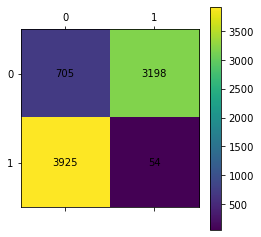

In [47]:
print("Contingency matrix:\n", contingency_matrix)

import matplotlib.pyplot as plt

# Visualize Contingency Matrix
plt.matshow(contingency_matrix)
plt.colorbar()

for i in range(2):
    for j in range(2):
        c = contingency_matrix[j,i]
        plt.text(i, j, str(c), va='center', ha='center')
 

#### QUESTION 3: Report the 5 measures above for the K-means clustering results you get.

In [105]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(binary_class, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(binary_class, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(binary_class, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(binary_class, km.labels_))
print("Adjusted Mutual Information Score: %.3f"
     % metrics.adjusted_mutual_info_score(binary_class, km.labels_))
print()

Homogeneity: 0.572
Completeness: 0.588
V-measure: 0.580
Adjusted Rand-Index: 0.632
Adjusted Mutual Information Score: 0.580



#### QUESTION 4: Report the plot of the percent of variance the top r principle components can retain v.s. r, for r = 1 to 1000.

In [36]:
from sklearn.decomposition import TruncatedSVD
import numpy as np

# fit SVD model to 1000 components
SVD = TruncatedSVD(n_components=1000)
SVD.fit_transform(X_train_tfidf)

array([[ 0.13202992,  0.0013572 , -0.0118785 , ..., -0.01338651,
         0.0102846 ,  0.04875825],
       [ 0.13071614, -0.05379625, -0.05736558, ..., -0.02736548,
        -0.01135486,  0.0135757 ],
       [ 0.1574049 , -0.12033844,  0.11969389, ..., -0.02098952,
        -0.00550972, -0.00717507],
       ...,
       [ 0.07522627,  0.01059875, -0.01102102, ..., -0.02346075,
        -0.01560016, -0.0297106 ],
       [ 0.15158911,  0.01446036, -0.00536385, ..., -0.02560154,
        -0.00474014, -0.03455813],
       [ 0.06821521,  0.01989866,  0.01911755, ...,  0.02346003,
        -0.00598641,  0.00115735]])

In [107]:
# function to plot 5 measure scores
def scatter_plot_scores(x,y,xlabel,ylabel):
    plt.figure()
    plt.scatter(x,y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    
def bar_plot_scores(x,y,xlabel,ylabel):
    plt.figure()
    plt.bar(x,y, width=3)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)    

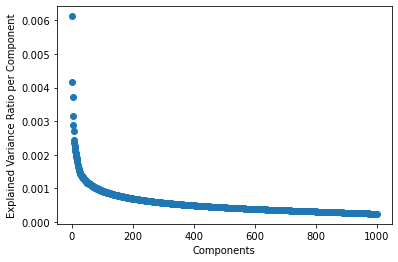

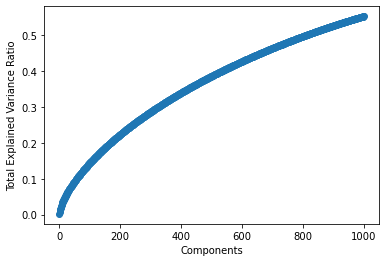

In [108]:
# plot explained variance ratio per component
scatter_plot_scores(np.arange(1000)+1, sorted(SVD.explained_variance_ratio_,reverse=True), "Components", "Explained Variance Ratio per Component")
scatter_plot_scores(np.arange(1000)+1, np.cumsum(SVD.explained_variance_ratio_), "Components", "Total Explained Variance Ratio")

#### QUESTION 5: Let r be the dimension that we want to reduce the data to (i.e. n components). Try r = 1, 2, 3, 5, 10, 20, 50, 100, 300, and plot the 5 measure scores v.s. r for both SVD and NMF. Report a good choice of r for SVD and NMF respectively. 
###### Note: In the choice of r, there is a trade-off between the information preservation, and better performance of k-means in lower dimensions.

#### SVD

In [95]:
r = [1,2,3,5,10,20,50,100,300]

homogeneity_scores = []
completeness_scores = []
vmeasure_scores = []
adjrand_scores = []
adjMI_scores = []

for component in r:
    SVD = TruncatedSVD(n_components=component)
    predicted = km.fit_predict(SVD.fit_transform(X_train_tfidf))
    
    homogeneity_scores.append(metrics.homogeneity_score(binary_class, predicted))
    completeness_scores.append(metrics.completeness_score(binary_class, predicted))
    vmeasure_scores.append(metrics.v_measure_score(binary_class, predicted))
    adjrand_scores.append(metrics.adjusted_rand_score(binary_class, predicted))
    adjMI_scores.append(metrics.adjusted_mutual_info_score(binary_class, predicted))
    

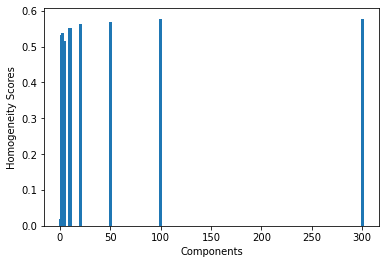

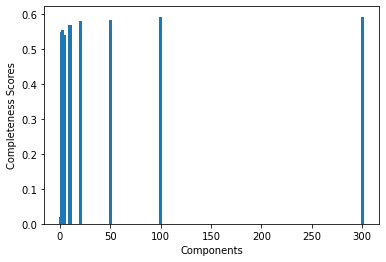

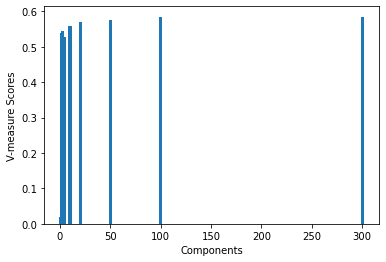

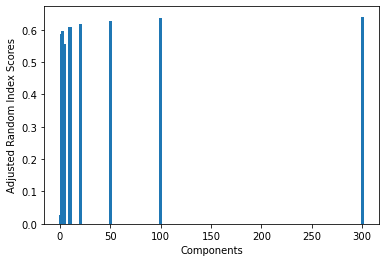

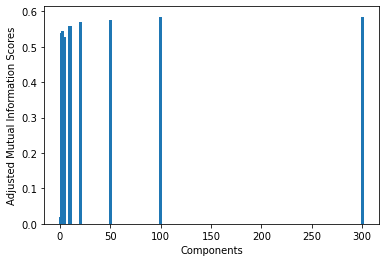

In [96]:
bar_plot_scores(r, homogeneity_scores, "Components", "Homogeneity Scores")
bar_plot_scores(r, completeness_scores, "Components", "Completeness Scores")
bar_plot_scores(r, vmeasure_scores, "Components", "V-measure Scores")
bar_plot_scores(r, adjrand_scores, "Components", "Adjusted Random Index Scores")
bar_plot_scores(r, adjMI_scores, "Components", "Adjusted Mutual Information Scores")

#### NMF

In [97]:
from sklearn.decomposition import NMF

homogeneity_scores = []
completeness_scores = []
vmeasure_scores = []
adjrand_scores = []
adjMI_scores = []

for component in r:
    nmf = NMF(n_components=component, init='random')
    predicted = km.fit_predict(nmf.fit_transform(X_train_tfidf))
    
    homogeneity_scores.append(metrics.homogeneity_score(binary_class, predicted))
    completeness_scores.append(metrics.completeness_score(binary_class, predicted))
    vmeasure_scores.append(metrics.v_measure_score(binary_class, predicted))
    adjrand_scores.append(metrics.adjusted_rand_score(binary_class, predicted))
    adjMI_scores.append(metrics.adjusted_mutual_info_score(binary_class, predicted))

C:\Users\Julia\Anaconda3\envs\python38\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


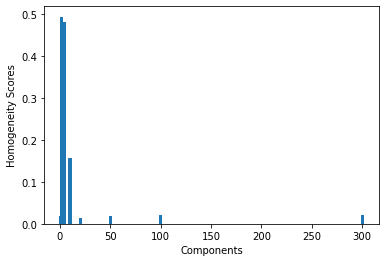

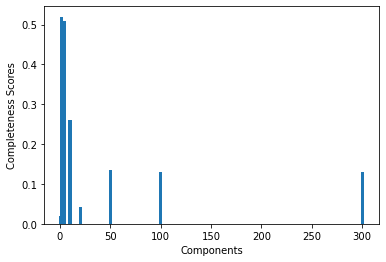

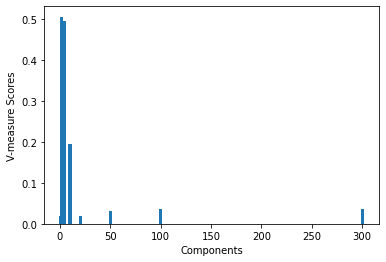

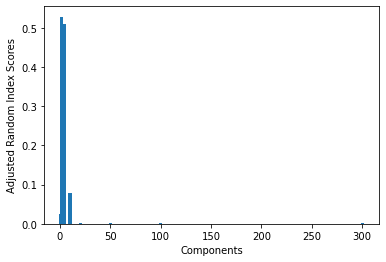

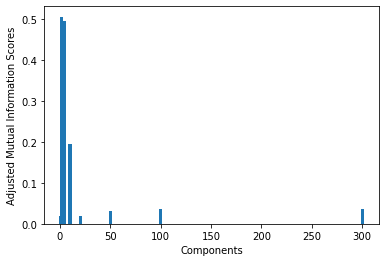

In [98]:
bar_plot_scores(r, homogeneity_scores, "Components", "Homogeneity Scores")
bar_plot_scores(r, completeness_scores, "Components", "Completeness Scores")
bar_plot_scores(r, vmeasure_scores, "Components", "V-measure Scores")
bar_plot_scores(r, adjrand_scores, "Components", "Adjusted Random Index Scores")
bar_plot_scores(r, adjMI_scores, "Components", "Adjusted Mutual Information Scores")

#### QUESTION 6: How do you explain the non-monotonic behavior of the measures as r increases?

For both the SVD and NMF plots, all 5 measure scores initially peak, and then slowly decrease as the number of components increases. This non-monotonic behavior can be explained because KMeans does not perform well with high dimensionality. KMeans clustering uses the Euclidean distance, which is not a good metric anymore for highly dimensional data because the distances between data points tends to be almost the same. Similarly, if the clusters are not round-shaped, KMeans can fail to identify the clusters properly. Therefore, the scores become increasingly lower as the dimensionality increases. 

#### QUESTION 7: Visualize the clustering results for:<br>• SVD with your choice of r<br>• NMF with your choice of r

For SVD and NMF, we can see from the plot above that the best r is r=2

In [13]:
SVD = TruncatedSVD(n_components=2)
svd_train = SVD.fit_transform(X_train_tfidf)

plt.figure()
plt.scatter(svd_train[:,0],svd_train[:,1], c=binary_class)
plt.title("Ground truth class labels (SVD)")
plt.legend()

NameError: name 'X_train_tfidf' is not defined

No handles with labels found to put in legend.


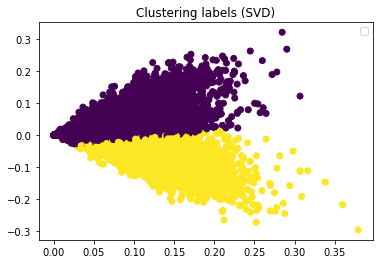

In [100]:
SVD = TruncatedSVD(n_components=2)
predicted = km.fit_predict(SVD.fit_transform(X_train_tfidf))

plt.figure()
plt.scatter(svd_train[:,0],svd_train[:,1], c=predicted)
plt.title("Clustering labels (SVD)")
plt.legend()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


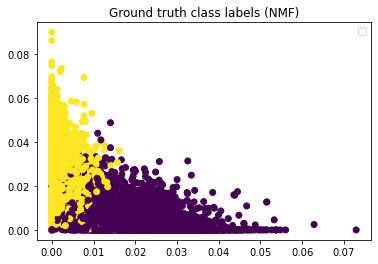

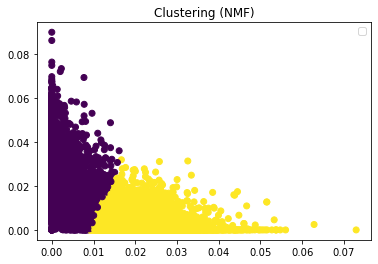

In [101]:
nmf = NMF(n_components=2, init='random')
nmf_train = nmf.fit_transform(X_train_tfidf)

plt.figure()
plt.scatter(nmf_train[:,0],nmf_train[:,1], c=binary_class)
plt.title("Ground truth class labels (NMF)")
plt.legend()

nmf = NMF(n_components=2, init='random')
predicted = km.fit_predict(nmf.fit_transform(X_train_tfidf))

plt.figure()
plt.scatter(nmf_train[:,0],nmf_train[:,1], c=predicted)
plt.title("Clustering (NMF)")
plt.legend()

#### QUESTION 8: What do you observe in the visualization? How are the data points of the two classes distributed? Is the data distribution ideal for K-Means clustering?


In the visualization, we can see that with r=2, for SVD, the distribution ranges from -.3 to .3. For NMF, the distribution ranges from 0 to .12. For both SVD and NMF, the classes seem to be evenly distributed, as seen in the plots above from the distribution of purple and yellow points (each class) being similar. For SVD, the data distribution is more ideal than NMF since the data points are in a round-like shape, whereas the NMF data distribution is almost triangular. Because KMeans clustering performs better under round-like shapes, SVD would be a more ideal data distribution.

#### QUESTION 9 Visualize for 20 categories

In [14]:
from sklearn.datasets import fetch_20newsgroups


# load dataset
dataset_all = fetch_20newsgroups(subset='all', # choose which subset of the dataset to use; can be 'train', 'test', 'all'
                                  shuffle=True,
                                  random_state=42, # set the seed of random number generator when shuffling to make the outcome repeatable across different runs
                                  remove=['headers', 'footers'],
                                 )


In [170]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_20 = CountVectorizer(min_df=3, stop_words='english')
v_counts_20 = vectorizer_20.fit_transform(dataset_all.data)

tfidf_transformer_20 = TfidfTransformer()
v_tfidf_20 = tfidf_transformer_20.fit_transform(v_counts_20)

# Print the shape of the datasets
v_tfidf_20.shape
#true_labels = dataset_all.target

(18846, 45365)

In [16]:
true_labels = dataset_all.target

In [ ]:
#from sklearn import metrics
#from sklearn.cluster import KMeans, MiniBatchKMeans

#km = KMeans(n_clusters=20, init='k-means++', max_iter=1000, n_init=30, random_state=0)
#km.fit(v_tfidf_20)
#contingency_matrix_all = metrics.cluster.contingency_matrix(true_labels, km.labels_)

In [171]:
# helper function to generate scores

from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics.cluster import v_measure_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import adjusted_mutual_info_score

def measure_scores (label_true, label_pred):
    print ("Homogeneity_score = %f" % homogeneity_score(label_true, label_pred))
    print ("Completeness_score = %f" % completeness_score(label_true, label_pred))
    print ("Adjusted_rand_score = %f" % adjusted_rand_score(label_true, label_pred))
    print ("V_measure_score = %f" % v_measure_score(label_true, label_pred))
    print ("Adjusted_mutual_info_score = %f" % adjusted_mutual_info_score(label_true, label_pred))

#### Dimension Reduction - SVD

try with 20 classes again with SVD where r = 100

In [49]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

svd = TruncatedSVD(n_components=100)
svd_matrix = svd.fit_transform(v_tfidf_20)

In [50]:
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans

km = KMeans(n_clusters=20, init='k-means++', max_iter=1000, n_init=30, random_state=0)
km.fit(svd_matrix)
contingency_matrix_all = metrics.cluster.contingency_matrix(true_labels, km.labels_)

In [53]:
measure_scores(true_labels, km.labels_)

Homogeneity_score = 0.343393
Completeness_score = 0.405948
Adjusted_rand_score = 0.120837
V_measure_score = 0.372060
Adjusted_mutual_info_score = 0.369848


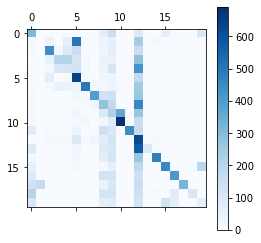

In [54]:
# permuted matrix
import numpy as np
from scipy.optimize import linear_sum_assignment

rows, cols = linear_sum_assignment(contingency_matrix_all, maximize=True)
contingency_matrix_permuted = contingency_matrix_all[rows[:, np.newaxis], cols]

plt.matshow(contingency_matrix_permuted, cmap=plt.cm.Blues)
plt.colorbar()
plt.tick_params(labelsize=10)

#### Question 10:Kullback-Leibler Divergence for NMF

In [62]:
from sklearn.decomposition import NMF

nmf = NMF(n_components = 20, init='random', random_state=0, beta_loss='kullback-leibler', solver='mu', max_iter=1000)
nmf_matrix = nmf.fit_transform(v_tfidf_20)

km_nmf = KMeans(n_clusters=20, init='k-means++', max_iter=1000, n_init=30, random_state=0)
km_nmf.fit(nmf_matrix)
contingency_matrix_nmf = metrics.cluster.contingency_matrix(true_labels, km_nmf.labels_)

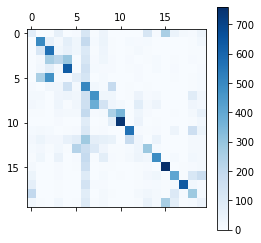

In [63]:
import numpy as np
import matplotlib.pyplot as plt

rows, cols = linear_sum_assignment(contingency_matrix_nmf, maximize=True)
contingency_matrix_nmf = contingency_matrix_nmf[rows[:, np.newaxis], cols]

plt.matshow(contingency_matrix_nmf, cmap=plt.cm.Blues)
plt.colorbar()
plt.tick_params(labelsize=10)



In [64]:
measure_scores(true_labels, km_nmf.labels_)

Homogeneity_score = 0.403971
Completeness_score = 0.425444
Adjusted_rand_score = 0.221164
V_measure_score = 0.414429
Adjusted_mutual_info_score = 0.412489


#### Question 11: UMAP

Use UMAP to reduce the dimensionality of the 20 categories TF-IDF
matrix, and apply K-Means clustering with n_components=20 .
Find a good n components choice for UMAP, and compare the performance of two metrics
by setting metric="euclidean" and metric="cosine" respectively.
Report the permuted contingency matrix and the five clustering evaluation metrics
for "euclidean" and "cosine".

In [65]:
import umap.umap_ as umap

In [ ]:
import pandas as pd

r = [1,2,3,5,10,20,50,100,300]

homogeneity_scores = []
completeness_scores = []
vmeasure_scores = []
adjrand_scores = []
adjMI_scores = []

for component in r:
    umap_euclidean = umap.UMAP(n_components=component, metric='euclidean').fit_transform(v_tfidf_20) 
    #umap_cosine = umap.UMAP(n_components=5, metric='cosine').fit_transform(v_tfidf_20) 
    
    km_umap_euclidean = KMeans(n_clusters=20, init='k-means++', max_iter=1000, n_init=30, random_state=0)
    km_umap_predicted_euclidean = km_umap_euclidean.fit(umap_euclidean)
    #contingency_matrix_umap = metrics.cluster.contingency_matrix(true_labels, km_umap_predicted.labels_)
    
    homogeneity_scores.append(metrics.homogeneity_score(true_labels, km_umap_predicted_euclidean.labels_))
    completeness_scores.append(metrics.completeness_score(true_labels, km_umap_predicted_euclidean.labels_))
    vmeasure_scores.append(metrics.v_measure_score(true_labels, km_umap_predicted_euclidean.labels_))
    adjrand_scores.append(metrics.adjusted_rand_score(true_labels, km_umap_predicted_euclidean.labels_))
    adjMI_scores.append(metrics.adjusted_mutual_info_score(true_labels, km_umap_predicted_euclidean.labels_))


In [ ]:
print('Table : euclidean clustering metrics with different UMAP r')
pd_score = pd.DataFrame(np.array([homogeneity_scores,completeness_scores,vmeasure_scores,adjrand_scores, adjMI_scores]),
                   columns= r)

pd_score = pd_score.rename(index={0: "homogeneity_scores", 1: "completeness_scores", 2: "vmeasure_scores", 3: "adjrand_scores", 4: "adjMI_scores"})
pd_score.T

In [234]:
import pandas as pd

r = [1,2,3,5,10,20,50,100,300]

homogeneity_scores_cosine = []
completeness_scores_cosine = []
vmeasure_scores_cosine = []
adjrand_scores_cosine = []
adjMI_scores_cosine = []

for component in r:
    #umap_euclidean = umap.UMAP(n_components=5, metric='euclidean').fit_transform(v_tfidf_20) 
    umap_cosine = umap.UMAP(n_components=component, metric='cosine').fit_transform(v_tfidf_20) 
    
    from sklearn.impute import SimpleImputer
    imp = SimpleImputer(missing_values=np.nan, strategy='mean')
    imp.fit(umap_cosine)
    umap_cosine = imp.transform(umap_cosine)
    
    km_umap_cosine = KMeans(n_clusters=20, init='k-means++', max_iter=1000, n_init=30, random_state=0)
    km_umap_predicted_cosine = km_umap_cosine.fit(umap_cosine)
    #contingency_matrix_umap = metrics.cluster.contingency_matrix(true_labels, km_umap_predicted.labels_)
    
    homogeneity_scores_cosine.append(metrics.homogeneity_score(true_labels, km_umap_predicted_cosine.labels_))
    completeness_scores_cosine.append(metrics.completeness_score(true_labels, km_umap_predicted_cosine.labels_))
    vmeasure_scores_cosine.append(metrics.v_measure_score(true_labels, km_umap_predicted_cosine.labels_))
    adjrand_scores_cosine.append(metrics.adjusted_rand_score(true_labels, km_umap_predicted_cosine.labels_))
    adjMI_scores_cosine.append(metrics.adjusted_mutual_info_score(true_labels, km_umap_predicted_cosine.labels_))

In [235]:
print('Table : cosine clustering metrics with different UMAP r')
pd_score_cosine = pd.DataFrame(np.array([homogeneity_scores_cosine,completeness_scores_cosine,vmeasure_scores_cosine,adjrand_scores_cosine, adjMI_scores_cosine]),
                   columns= r)

pd_score_cosine = pd_score_cosine.rename(index={0: "homogeneity_scores", 1: "completeness_scores", 2: "vmeasure_scores", 3: "adjrand_scores", 4: "adjMI_scores"})
pd_score_cosine.T

Table : cosine clustering metrics with different UMAP r


,homogeneity_scores,completeness_scores,vmeasure_scores,adjrand_scores,adjMI_scores
1,0.392653,0.409463,0.400882,0.263426,0.398890
2,0.558409,0.573179,0.565697,0.432436,0.564266
3,0.564414,0.583165,0.573637,0.444454,0.572226
5,0.549612,0.586793,0.567594,0.427757,0.566138
10,0.576594,0.599718,0.587929,0.458961,0.586560
20,0.554766,0.592964,0.573230,0.433158,0.571791
50,0.545157,0.593215,0.568172,0.421029,0.566726
100,0.557889,0.602457,0.579317,0.441621,0.577932
300,0.531960,0.626499,0.575372,0.403935,0.574098


##### euclidean r = 10

In [236]:
%%time
umap_euclidean = umap.UMAP(n_components=10, metric='euclidean').fit_transform(v_tfidf_20) # removed true_labels n_components = 2
umap_cosine = umap.UMAP(n_components=10, metric='cosine').fit_transform(v_tfidf_20) #cosine 

Wall time: 1min 9s


In [237]:
km_umap_euclidean = KMeans(n_clusters=20, init='k-means++', max_iter=1000, n_init=30, random_state=0)
km_umap_euclidean_predicted = km_umap_euclidean.fit(umap_euclidean)
contingency_matrix_umap_euclidean = metrics.cluster.contingency_matrix(true_labels, km_umap_euclidean.labels_)

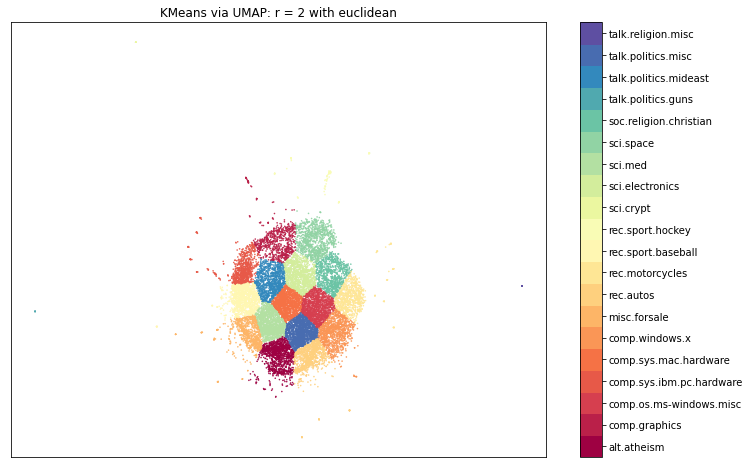

In [149]:
# plotted with euclidean r = 2 for illustration purpose

classes = dataset_all.target_names

fig, ax = plt.subplots(1, figsize=(12, 8))
plt.scatter(*umap_euclidean.T, s=0.3, c=km_umap_euclidean.labels_, cmap='Spectral', alpha=1.0) # use predicted 
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(21)-0.5)
cbar.set_ticks(np.arange(21))
cbar.set_ticklabels(classes)
plt.title('KMeans via UMAP: r = 2 with euclidean');

##### cosine r = 10

In [238]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(umap_cosine)
umap_cosine = imp.transform(umap_cosine)

In [239]:
km_umap_cosine = KMeans(n_clusters=20, init='k-means++', max_iter=1000, n_init=30, random_state=0)
km_umap_cosine_predicted = km_umap_cosine.fit(umap_cosine)
contingency_matrix_umap_cosine = metrics.cluster.contingency_matrix(true_labels, km_umap_cosine.labels_)

In [240]:
# calculate 5 measure scores
measure_scores(true_labels, km_umap_cosine.labels_)

Homogeneity_score = 0.577849
Completeness_score = 0.597595
Adjusted_rand_score = 0.465690
V_measure_score = 0.587556
Adjusted_mutual_info_score = 0.586191


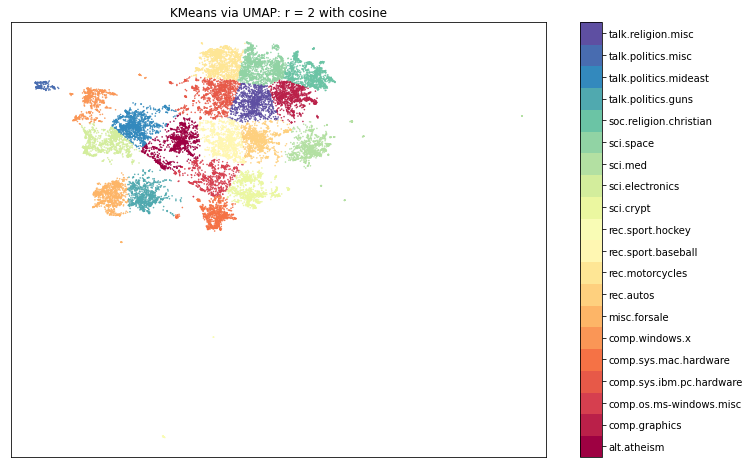

In [155]:
# plotted with cosine r = 2 for illustration purpose

classes = dataset_all.target_names

fig, ax = plt.subplots(1, figsize=(12, 8))
plt.scatter(*umap_cosine.T, s=0.3, c=km_umap_cosine.labels_, cmap='Spectral', alpha=1.0) # use predicted 
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(21)-0.5)
cbar.set_ticks(np.arange(21))
cbar.set_ticklabels(classes)
plt.title('KMeans via UMAP: r = 2 with cosine');

#### QUESTION 12: Analyze the contingency matrix (in report)

Homogeneity_score = 0.014929
Completeness_score = 0.015685
Adjusted_rand_score = 0.002797
V_measure_score = 0.015297
Adjusted_mutual_info_score = 0.012032


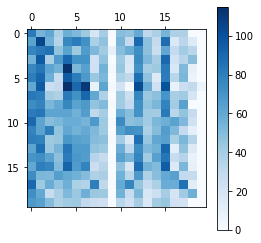

In [162]:
# UMAP - euclidean contigency matrix

import numpy as np
import matplotlib.pyplot as plt

contingency_matrix_euc = metrics.cluster.contingency_matrix(true_labels, km_umap_euclidean.labels_)
rows, cols = linear_sum_assignment(contingency_matrix_euc, maximize=True)
contingency_matrix_euc = contingency_matrix_euc[rows[:, np.newaxis], cols]

plt.matshow(contingency_matrix_euc, cmap=plt.cm.Blues)
plt.colorbar()
plt.tick_params(labelsize=10)

measure_scores(true_labels, km_umap_euclidean.labels_)

Homogeneity_score = 0.577849
Completeness_score = 0.597595
Adjusted_rand_score = 0.465690
V_measure_score = 0.587556
Adjusted_mutual_info_score = 0.586191


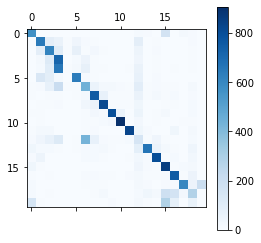

In [241]:
# UMAP - cosine contigency matrix

import numpy as np
import matplotlib.pyplot as plt

contingency_matrix_cos = metrics.cluster.contingency_matrix(true_labels, km_umap_cosine.labels_)
rows, cols = linear_sum_assignment(contingency_matrix_cos, maximize=True)
contingency_matrix_cos = contingency_matrix_cos[rows[:, np.newaxis], cols]

plt.matshow(contingency_matrix_cos, cmap=plt.cm.Blues)
plt.colorbar()
plt.tick_params(labelsize=10)

measure_scores(true_labels, km_umap_cosine.labels_)

### Q13 Use UMAP to reduce the dimensionality properly, and perform Agglomerative clustering with n_clusters=20 . Compare the performance of “ward” and “single” linkage criteria.


In [ ]:
import pandas as pd
import numpy as np
import umap
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.impute import SimpleImputer
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
import matplotlib.pyplot as plt
import plot_mat



train = fetch_20newsgroups(subset='all', # choose which subset of the dataset to use; can be 'train', 'test', 'all'
                                  shuffle=True,
                                  random_state=42, # set the seed of random number generator when shuffling to make the outcome repeatable across different runs
                                  remove=['headers', 'footers'])

count_vect = CountVectorizer(min_df=3, stop_words='english')
train_dataset = count_vect.fit_transform(train.data)
tfidf_transformer = TfidfTransformer()
train_tfidf = tfidf_transformer.fit_transform(train_dataset)
imp = SimpleImputer(missing_values=np.nan, strategy='mean')



agglomerative_metrics = pd.DataFrame(columns = ['model', 'homogeneity_score', 'completeness_score', 'vmeasure_score', 'adjrand_score', 'adjMI_score'])

In [ ]:
r = [1,2,3,5,10,20,50,100,300]
umap_metric = ['euclidean', 'cosine']
linkage_criteria = ['ward', 'single']

for component in r:
    for i in umap_metric:
        for j in linkage_criteria:
            my_umap = umap.UMAP(n_components=component, metric = i)
            umap_tfidf = my_umap.fit_transform(train_tfidf)
            umap_tfidf = imp.fit_transform(umap_tfidf)
            agglomerative = AgglomerativeClustering(n_clusters=20,linkage=j)
            predicted = agglomerative.fit_predict(umap_tfidf)
            
            model = "Agglomerative UMAP r=" + str(component) + " Metric=" + i + " LinkageCriteria=" + j
            homogeneity_score = metrics.homogeneity_score(train.target, predicted)
            completeness_score = metrics.completeness_score(train.target, predicted)
            vmeasure_score = metrics.v_measure_score(train.target, predicted)
            adjrand_score = metrics.adjusted_rand_score(train.target, predicted)
            adjMI_score = metrics.adjusted_mutual_info_score(train.target, predicted)
            new_row = {'model': model, 'homogeneity_score': homogeneity_score, 'completeness_score': completeness_score, 'vmeasure_score': vmeasure_score, 'adjrand_score': adjrand_score, 'adjMI_score': adjMI_score}
            agglomerative_metrics = agglomerative_metrics.append(new_row, ignore_index=True)
            #print(agglomerative_metrics.tail(1))
 


In [ ]:
pd.set_option('display.max_colwidth', -1)
agglomerative_metrics

### QUESTION 14: 
Apply DBSCAN and HDBSCAN on UMAP-transformed 20-category data. Use min_cluster_size=100. Experiment on the hyperparametER and report your findings in terms of the five
clustering evaluation metrics.

In [ ]:
from sklearn.cluster import DBSCAN
my_umap = umap.UMAP(n_components=5, metric = 'cosine')
umap_tfidf = my_umap.fit_transform(train_tfidf)
umap_tfidf = imp.fit_transform(umap_tfidf)

In [ ]:
dbscan_metrics = pd.DataFrame(columns = ['model', 'homogeneity_score', 'completeness_score', 'vmeasure_score', 'adjrand_score', 'adjMI_score', 'number_of_clusters', 'number_of_noise'])

eps_list = [1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.0001]
min_sample = [1, 5, 10, 50, 100, 500]
metric = ['cityblock', 'cosine', 'euclidean']



for i in eps_list:
    for j in min_sample:
        for k in metric:
            
            db = DBSCAN(eps=i, min_samples=j, metric = k)
            predicted = db.fit_predict(umap_tfidf)
            
            model = "DBSCAN UMAP eps=" + str(i) + " min_sample = " + str(j) + " metric = " + k
            homogeneity_score = metrics.homogeneity_score(train.target, predicted)
            completeness_score = metrics.completeness_score(train.target, predicted)
            vmeasure_score = metrics.v_measure_score(train.target, predicted)
            adjrand_score = metrics.adjusted_rand_score(train.target, predicted)
            adjMI_score = metrics.adjusted_mutual_info_score(train.target, predicted)
            new_row = {'model': model, 'homogeneity_score': homogeneity_score, 'completeness_score': completeness_score, 'vmeasure_score': vmeasure_score, 'adjrand_score': adjrand_score, 'adjMI_score': adjMI_score, 'number_of_clusters': len(set(predicted)) - (1 if -1 in predicted else 0), 'number_of_noise':  list(predicted).count(-1)}
            dbscan_metrics = dbscan_metrics.append(new_row, ignore_index=True)
            #print(dbscan_metrics.tail(1))

In [ ]:
pd.set_option("display.max_rows", None)
dbscan_metrics[((dbscan_metrics['number_of_clusters'] <= 30) & (dbscan_metrics['number_of_clusters'] >= 10))]

In [ ]:
import hdbscan
import pandas as pd
import numpy as np
import umap
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.impute import SimpleImputer
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
import matplotlib.pyplot as plt
import plot_mat
import umap



train = fetch_20newsgroups(subset='all', # choose which subset of the dataset to use; can be 'train', 'test', 'all'
                                  shuffle=True,
                                  random_state=42, # set the seed of random number generator when shuffling to make the outcome repeatable across different runs
                                  remove=['headers', 'footers'])

count_vect = CountVectorizer(min_df=3, stop_words='english')
train_dataset = count_vect.fit_transform(train.data)
tfidf_transformer = TfidfTransformer()
train_tfidf = tfidf_transformer.fit_transform(train_dataset)
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

# my_umap = umap.UMAP(n_components=5, metric = 'cosine')
# umap_tfidf = my_umap.fit_transform(train_tfidf)
# umap_tfidf = imp.fit_transform(umap_tfidf)

In [ ]:

hdbscan_metrics = pd.DataFrame(columns = ['model', 'homogeneity_score', 'completeness_score', 'vmeasure_score', 'adjrand_score', 'adjMI_score', 'number_of_clusters', 'number_of_noise'])

eps_list = [0.5, 0.1, 0.05, 0.01]
min_sample = [5, 10, 50]
r = [2, 3, 5, 10, 20]
metric = ['cityblock', 'euclidean']


for k in r:
    my_umap = umap.UMAP(n_components=k, metric = 'cosine')
    umap_tfidf = my_umap.fit_transform(train_tfidf)
    umap_tfidf = imp.fit_transform(umap_tfidf)
    
    for i in eps_list:
        for j in min_sample:
            for p in metric:
           
                hdb = hdbscan.HDBSCAN(min_cluster_size=100, min_samples=j, cluster_selection_epsilon = i, metric = p)
                predicted = hdb.fit_predict(umap_tfidf)

                model = "HDBSCAN eps=" + str(i) + " min_sample = " + str(j) + " metric = " + p + " UMAP r = " + str(k)
                homogeneity_score = metrics.homogeneity_score(train.target, predicted)
                completeness_score = metrics.completeness_score(train.target, predicted)
                vmeasure_score = metrics.v_measure_score(train.target, predicted)
                adjrand_score = metrics.adjusted_rand_score(train.target, predicted)
                adjMI_score = metrics.adjusted_mutual_info_score(train.target, predicted)
                new_row = {'model': model, 'homogeneity_score': homogeneity_score, 'completeness_score': completeness_score, 'vmeasure_score': vmeasure_score, 'adjrand_score': adjrand_score, 'adjMI_score': adjMI_score, 'number_of_clusters': len(set(predicted)) - (1 if -1 in predicted else 0), 'number_of_noise':  list(predicted).count(-1)}
                hdbscan_metrics = hdbscan_metrics.append(new_row, ignore_index=True)
                #print(hdbscan_metrics.tail(1))

In [ ]:
pd.set_option("display.max_rows", None, 'display.max_colwidth', -1)
hdbscan_metrics[((hdbscan_metrics['number_of_clusters'] <= 30) & (hdbscan_metrics['number_of_clusters'] >= 10) & (hdbscan_metrics['vmeasure_score'] >= 0.51) & (hdbscan_metrics['adjrand_score'] >= 0.23))]

### QUESTION 15: Contingency matrix 
Plot the permuted contingency matrix for the best clustering model from Question 14. How many clusters are given by the model? What does “-1” mean for the clustering labels? Interpret the contingency matrix considering the answer to these questions.


In [ ]:
my_umap = umap.UMAP(n_components=5, metric = 'cosine')
umap_tfidf = my_umap.fit_transform(train_tfidf)
umap_tfidf = imp.fit_transform(umap_tfidf)

hdb = hdbscan.HDBSCAN(min_cluster_size=100, min_samples=10, cluster_selection_epsilon = 0.5, metric = 'cityblock')
predicted = hdb.fit_predict(umap_tfidf)

In [ ]:
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment
cm = confusion_matrix(train.target, predicted)

In [ ]:
rows, cols = linear_sum_assignment(cm, maximize=True)
plot_mat.plot_sim_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows,pic_fname="hdbscan",size=(10,10))
plt.show()